## Dataset Collection and Preparation Process

### Data Collection

The data was collected from **official JoSAA counselling cutoff releases** for each year from **2018 to 2025**.  
For every year, JoSAA publishes institute-wise and branch-wise **opening and closing ranks** for all counselling rounds.

Each yearly dataset contains:
- Institute name
- Academic program (branch and degree)
- Seat quota and category
- Gender-based seat information
- Opening and closing ranks
- Counselling round details

These yearly cutoff tables were extracted and converted into a **tabular format** so they could be analyzed programmatically.

### Data Merging Process

After collecting cutoff data for each individual year:
1. All yearly datasets were **standardized to the same column structure**
2. Column names and category labels were **made consistent**
3. A new column **`Year`** was added to each dataset to preserve the counselling year
4. All yearly datasets were then **vertically merged (row-wise concatenation)** into a single dataset

This resulted in one consolidated dataset containing cutoff data across **multiple years and counselling rounds**.

## Dataset Overview

This dataset contains **JoSAA JEE cutoff data from 2018 to 2025**, created by collecting and merging official cutoff releases for each year.  
Each row represents the **opening and closing rank for a specific institute–program–category–gender–round combination** in a given year.

## Dataset Shape

- **Rows:** Each row corresponds to one unique seat allocation record  
- **Columns:** 9  
- **Time Span:** 2018–2025 (8 years)

## Columns Description

**Institute** - Name of the institute participating in JoSAA counselling 
**Academic Program Name** -  Branch and degree offered by the institute 
**Quota** -  Seat quota under JoSAA (e.g., All India quota) 
**Seat Type** -  Category of the seat such as OPEN, OBC-NCL, SC, ST, EWS 
**Gender** -  Gender eligibility of the seat (Gender-Neutral / Female-only) 
**Opening Rank** -  JEE rank at which admission started for the seat 
**Closing Rank** -  JEE rank at which admission closed for the seat 
**Round** -  Counselling round number 
**Year** -  Year of JoSAA counselling 

## What This Dataset Can Be Used For

This dataset can be used to:
- Determine **college and branch eligibility** for a given JEE rank
- Build a **JEE College Predictor** using rule-based logic
- Analyze **cutoff trends across multiple years**
- Compare **category-wise and gender-wise cutoffs**
- Perform exploratory data analysis (EDA) on engineering admissions in India

## Key Characteristics of the Dataset

- Contains **real-world admission data**
- Covers **multiple institutes, branches, and counselling rounds**
- Includes **historical trends**, not a single-year snapshot


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv("merged_jee_cutoff_2018_2025.csv")
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057.0,6780.0,1,2018
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078.0,10789.0,1,2018
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,1649.0,2592.0,1,2018
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),4343.0,4522.0,1,2018
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1054.0,1233.0,1,2018


In [70]:
df.shape

(433993, 9)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433993 entries, 0 to 433992
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Institute              433993 non-null  object 
 1   Academic Program Name  433992 non-null  object 
 2   Quota                  433992 non-null  object 
 3   Seat Type              433991 non-null  object 
 4   Gender                 433990 non-null  object 
 5   Opening Rank           432525 non-null  float64
 6   Closing Rank           432524 non-null  float64
 7   Round                  433993 non-null  int64  
 8   Year                   433993 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 29.8+ MB


In [72]:
df.describe()

,Opening Rank,Closing Rank,Round,Year
count,4.325250e+05,4.325240e+05,433993.000000,433993.000000
mean,1.091298e+04,1.378077e+04,3.547546,2021.776517
std,3.120640e+04,4.163089e+04,1.798195,2.353832
min,1.000000e+00,1.000000e+00,1.000000,2018.000000
25%,1.218000e+03,1.485000e+03,2.000000,2020.000000
50%,3.783000e+03,4.555000e+03,4.000000,2022.000000
75%,1.010400e+04,1.221700e+04,5.000000,2024.000000
max,1.274910e+06,1.368129e+06,7.000000,2025.000000


In [73]:
df.isnull().sum()

Institute                   0
Academic Program Name       1
Quota                       1
Seat Type                   2
Gender                      3
Opening Rank             1468
Closing Rank             1469
Round                       0
Year                        0
dtype: int64

In [74]:
df.isnull().sum().sum()

np.int64(2944)

In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
df.columns

Index(['Institute', 'Academic Program Name', 'Quota', 'Seat Type', 'Gender',
       'Opening Rank', 'Closing Rank', 'Round', 'Year'],
      dtype='object')

## Overview

Dataset Shape: 433993 rows × 15 columns Data Types: 2 float, 2 integer, 5 object columns

Missing Values:
1. Total Missing Values ~2950 null values
2. Duplicates: No duplicate records found

Overall Data Status:The dataset is **large, well-structured, and mostly complete**, requiring only minimal cleaning.

## Data Cleaning

In [77]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057.0,6780.0,1,2018
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078.0,10789.0,1,2018
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,1649.0,2592.0,1,2018
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),4343.0,4522.0,1,2018
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1054.0,1233.0,1,2018


In [78]:
df.dtypes

Institute                 object
Academic Program Name     object
Quota                     object
Seat Type                 object
Gender                    object
Opening Rank             float64
Closing Rank             float64
Round                      int64
Year                       int64
dtype: object

In [79]:
df.isnull().sum()

Institute                   0
Academic Program Name       1
Quota                       1
Seat Type                   2
Gender                      3
Opening Rank             1468
Closing Rank             1469
Round                       0
Year                        0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

Institute                0
Academic Program Name    0
Quota                    0
Seat Type                0
Gender                   0
Opening Rank             0
Closing Rank             0
Round                    0
Year                     0
dtype: int64

In [82]:
df.shape

(432524, 9)

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df = df[df["Opening Rank"] <= df["Closing Rank"]]


In [85]:
df.shape

(432524, 9)

## Data Cleaning Summary

### Handling Missing Values

After dropping null values, the dataset shape became:
- **Rows:** 432,524  
- **Columns:** 9  

This confirms that only a small number of records were affected, while the overall dataset size remained largely intact.

### Duplicate Records Check

A duplicate check was performed using key identifying columns.  
No duplicate records were found, confirming that each row represents a unique seat allocation scenario.

### Rank Logic Validation

The dataset was validated to ensure that the **Opening Rank is not greater than the Closing Rank**.
- No records were found where Opening Rank > Closing Rank
- Rows where Opening Rank equals Closing Rank were retained, as they represent valid seat allocation cases

### Conclusion

After these cleaning steps, the dataset is **clean, consistent, and ready** for use in eligibility logic and college prediction.

## EDA

In [86]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057.0,6780.0,1,2018
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078.0,10789.0,1,2018
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,1649.0,2592.0,1,2018
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),4343.0,4522.0,1,2018
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1054.0,1233.0,1,2018


<Axes: xlabel='Year', ylabel='count'>

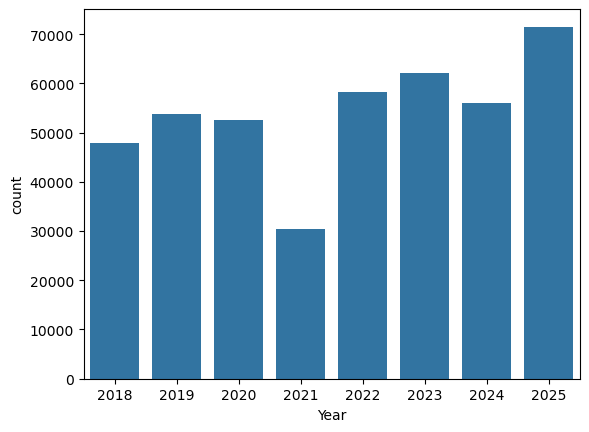

In [87]:
sns.countplot(data=df, x="Year")

- From the year-wise distribution, it can be observed that **2025 contains the highest number of cutoff records**, followed by **2023**.  
- The year **2021 has the lowest number of records**, while the remaining years are **approximately evenly distributed**.

This indicates that the dataset has broad coverage across years, with minor variations likely due to differences in counselling rounds or seat allocation structures in specific years.


<Axes: xlabel='Round', ylabel='count'>

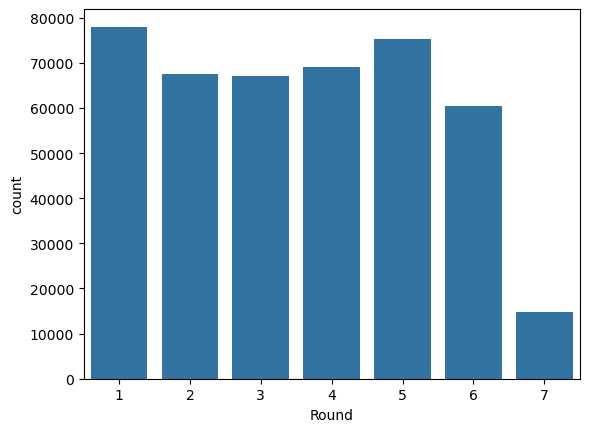

In [88]:
sns.countplot(data=df, x="Round")

- Round 1 contains the **highest number of cutoff records**, indicating the primary seat allocation phase.  
- Rounds 2 to 5 show **almost equal distribution of records**, suggesting stable seat availability during these stages.  
- In contrast, **Round 6 contains only around 60,000 records**, and **Round 7 has approx 15,000 records**, reflecting significantly lower participation in the later rounds.

This pattern aligns with JoSAA counselling behavior, where most seats are filled in the initial rounds, leaving fewer allocations in the final rounds.


<Axes: ylabel='Institute'>

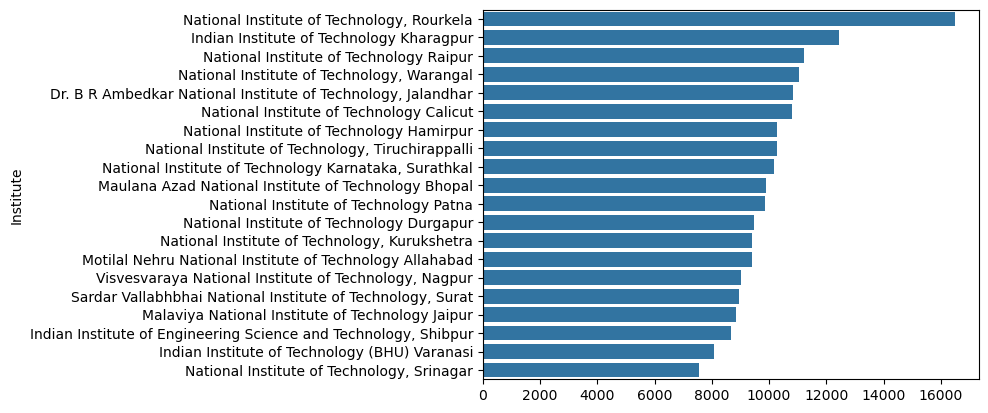

In [89]:
top_institutes = df["Institute"].value_counts().head(20)
sns.barplot(x=top_institutes.values,y=top_institutes.index)

The distribution shows that **National Institutes of Technology (NITs)** dominate the top positions in terms of the number of cutoff records.  
**NIT Rourkela** has the highest number of records, followed by **IIT Kharagpur** and **NIT Raipur**.

This pattern indicates that these institutes:
- Offer a wide range of academic programs  
- Participate consistently across multiple counselling rounds  
- Have diverse seat categories and gender-based allocations  

Overall, institutes with a larger academic and seat structure contribute more records to the dataset.

In [90]:
def get_institute_type(name):
    if "Indian Institute of Technology" in name:
        return "IIT"
    elif "Indian Institute  of Technology" in name:
        return "IIT"
    elif "National Institute of Technology" in name:
        return "NIT"
    elif "Indian Institute of Information Technology" in name:
        return "IIIT"
    else:
        return "GFTI"

In [91]:
df["Institute Type"] = df["Institute"].apply(get_institute_type)

In [92]:
df["Institute Type"].isnull().sum()

np.int64(0)

<Axes: xlabel='Institute Type', ylabel='count'>

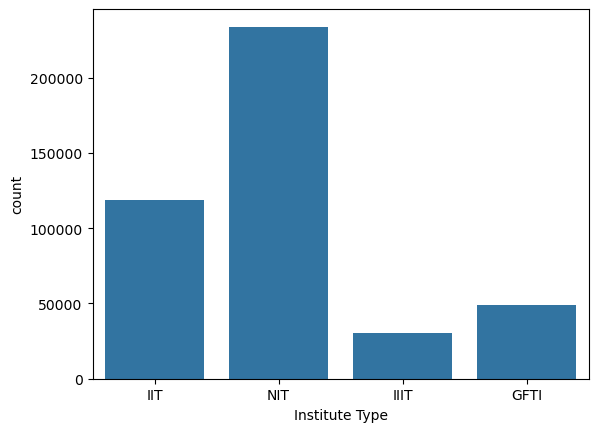

In [93]:
sns.countplot(data=df, x="Institute Type", order=["IIT", "NIT", "IIIT", "GFTI"])

- From the distribution of institute types, it is proved that **NITs contribute the largest share of records** in the dataset, with **more than 200,000 records**.  
- This is followed by **IITs**, which contribute approximately **100,000 records**.  
- **GFTIs** account for around **50,000 records**, while **IIITs have the lowest representation**, with only about **25,000 records**.

This distribution reflects the higher number of NIT institutions and programs participating in JoSAA counselling compared to IITs, IIITs, and GFTIs.


<Axes: ylabel='Academic Program Name'>

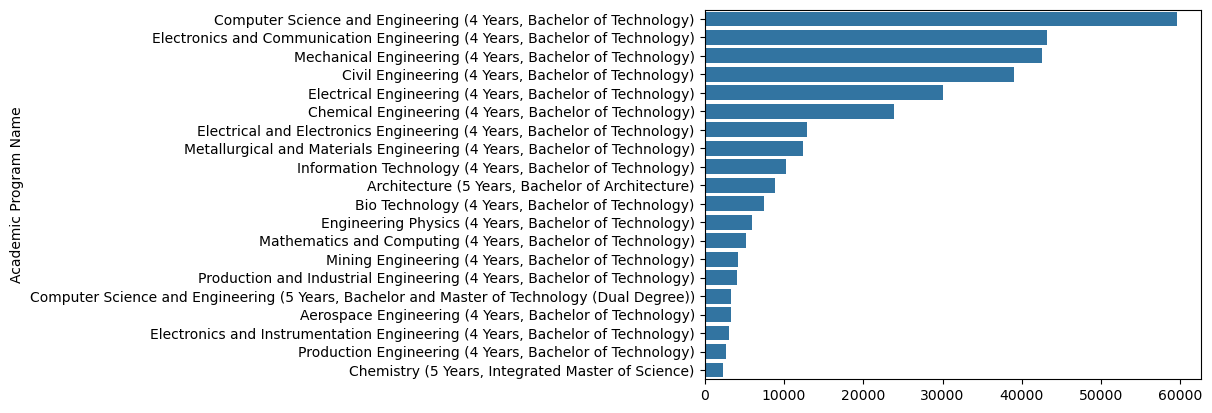

In [94]:
top_programs = df["Academic Program Name"].value_counts().head(20)
sns.barplot(x=top_programs.values,y=top_programs.index)

- The distribution of academic programs shows that **Computer Science and Engineering (CSE)** has the **highest number of cutoff records** in the dataset, indicating its widespread availability across institutes and counselling rounds.  
- CSE is followed by **Electronics and Communication Engineering (ECE)**, **Mechanical Engineering**, and **Civil Engineering**.

This pattern highlights the dominance and high demand of core engineering branches, particularly CSE, which is consistently offered across most participating institutes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OPEN'),
  Text(1, 0, 'OBC-NCL'),
  Text(2, 0, 'SC'),
  Text(3, 0, 'ST'),
  Text(4, 0, 'EWS'),
  Text(5, 0, 'OPEN (PwD)'),
  Text(6, 0, 'OBC-NCL (PwD)'),
  Text(7, 0, 'EWS (PwD)'),
  Text(8, 0, 'SC (PwD)'),
  Text(9, 0, 'ST (PwD)')])

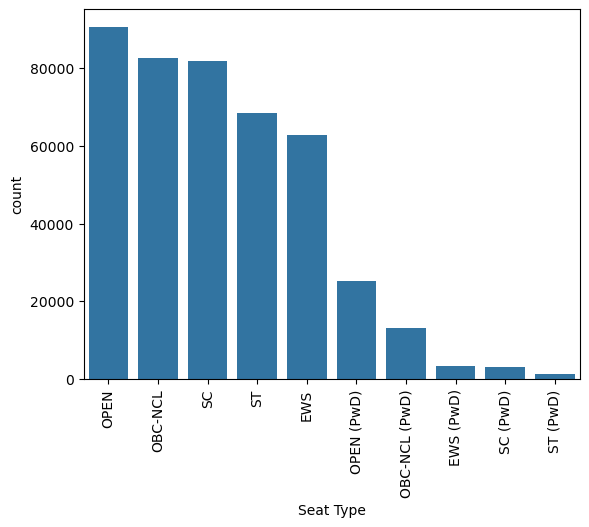

In [95]:
sns.countplot(data=df,x="Seat Type",order=df["Seat Type"].value_counts().index)
plt.xticks(rotation=90)

- The OPEN category has the **highest number of cutoff records**, indicating the largest share of seats under general allocation.  
- This is followed by **OBC-NCL** and **SC** categories, which also contribute a significant number of records.  
- Categories such as PwD (Persons with Disabilities) categories** have comparatively **fewer records**.

This distribution reflects the overall reservation structure in JoSAA counselling, where general and major reserved categories account for most seat allocations, while PwD-specific categories have limited seat availability.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OPEN'),
  Text(1, 0, 'OBC-NCL'),
  Text(2, 0, 'SC'),
  Text(3, 0, 'ST'),
  Text(4, 0, 'OPEN (PwD)'),
  Text(5, 0, 'OBC-NCL (PwD)'),
  Text(6, 0, 'SC (PwD)'),
  Text(7, 0, 'ST (PwD)'),
  Text(8, 0, 'EWS'),
  Text(9, 0, 'EWS (PwD)')])

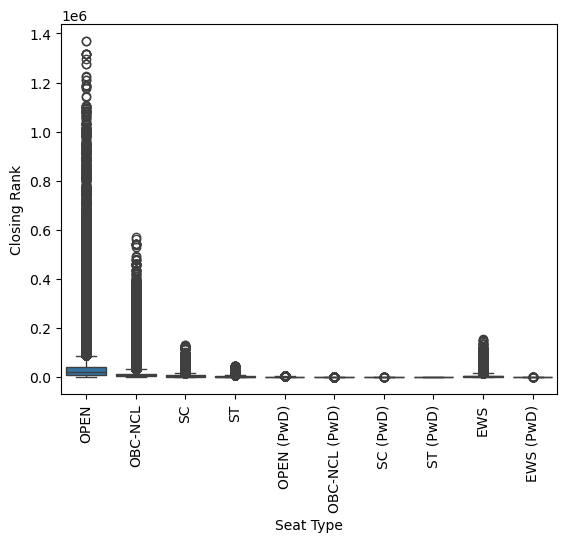

In [96]:
sns.boxplot(data=df,x="Seat Type",y="Closing Rank")
plt.xticks(rotation=90)

- The closing rank distribution varies significantly across seat categories.  
- OPEN and OBC-NCL categories show a **very wide spread of closing ranks**, ranging from highly competitive seats to low-demand programs, which results in a large number of visible outliers.
- Reserved categories such as SC, ST, and EWS exhibit **more compact distributions**, indicating relatively narrower cutoff ranges.  
- PwD categories show minimal spread due to **limited seat availability and smaller sample sizes**.

These outliers represent valid admissions in later rounds or low-demand branches and are a natural characteristic of JoSAA cutoff data.

<Axes: xlabel='Gender', ylabel='count'>

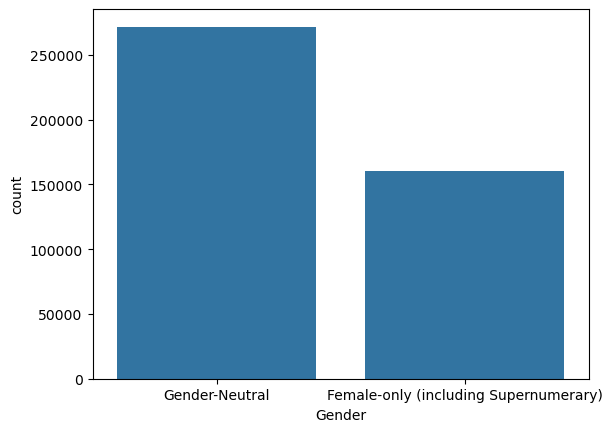

In [97]:
sns.countplot(data=df, x="Gender")

- From the gender-wise distribution, it can be observed that **gender-neutral seats dominate the dataset**, with approximately **250,000 records**.  
- In comparison, **female-only seats account for around 150,000 records**.

This indicates that while most seats under JoSAA counselling are gender-neutral, a significant number of seats are reserved exclusively for female candidates to promote gender diversity in engineering admissions.

<Axes: xlabel='Gender', ylabel='Closing Rank'>

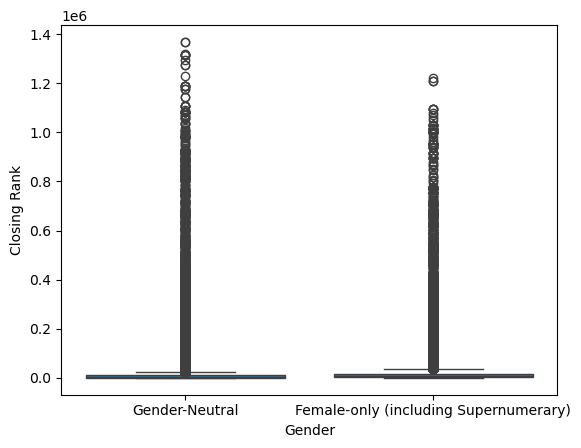

In [98]:
sns.boxplot(data=df,x="Gender",y="Closing Rank")

- The closing rank distribution shows noticeable differences between gender-neutral and female-only seats.  
- Gender-neutral seats generally have **lower median closing ranks**, indicating higher competition due to wider eligibility.
- Female-only seats (including supernumerary seats) tend to have **slightly higher closing ranks**, especially in later counselling rounds, reflecting relaxed cutoffs introduced to improve female participation in engineering programs.

Both categories exhibit a large number of high-rank outliers, which represent valid admissions in low-demand branches, smaller institutes, or final counselling rounds. These outliers are an inherent characteristic of JoSAA cutoff data and should not be treated as noise.

<Axes: xlabel='Opening Rank', ylabel='Count'>

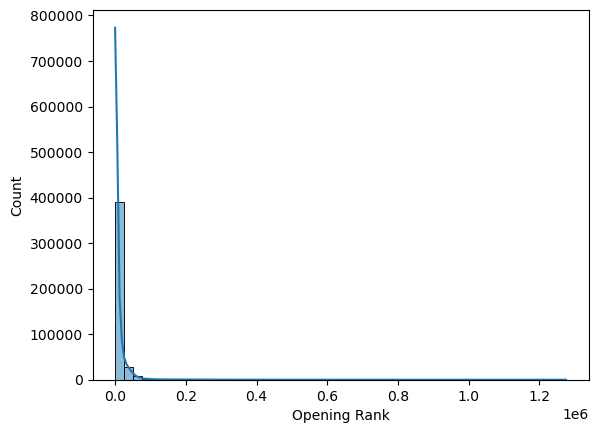

In [99]:
sns.histplot(data=df, x="Opening Rank", bins=50, kde=True)

- The opening rank distribution is **highly right-skewed**, with a very large concentration of records at **lower opening ranks**.  
- This indicates that most seats begin allocation at relatively competitive ranks, especially for popular institutes and branches.
- Only a small number of seats open at very high ranks, which typically correspond to **low-demand branches, smaller institutes, or later counselling rounds**.  

The long right tail represents valid admission scenarios and reflects the natural structure of JoSAA seat allocation.

<Axes: xlabel='Closing Rank', ylabel='Count'>

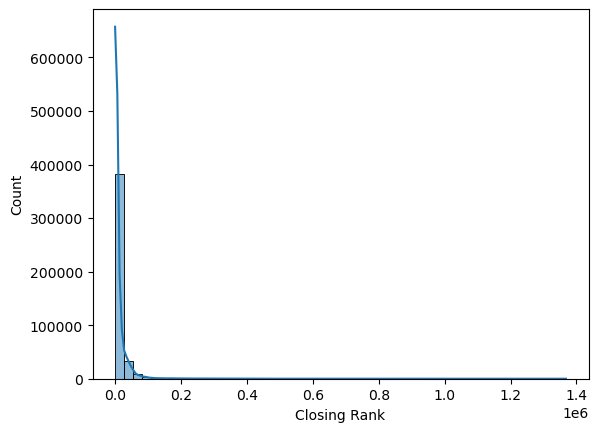

In [100]:
sns.histplot(data=df, x="Closing Rank", bins=50, kde=True)

- The closing rank distribution is **highly right-skewed**, with a large concentration of records at **lower closing ranks**.  
- This indicates that a majority of seats close at relatively competitive ranks, especially for popular institutes like IITS and branches.
- The long tail extending toward higher ranks represents admissions in **low-demand programs, smaller institutes like IIITS, and later counselling rounds**.  

These high closing-rank values are valid and reflect the natural variation in JoSAA seat allocation rather than data anomalies.

In [101]:
sample_df = df.sample(n=50000, random_state=42)

### Why sampling was done
- Dataset has 4+ lakh rows
- Plotting everything would:
1. Overlap too much
2. Freeze notebook

<Axes: xlabel='Opening Rank', ylabel='Closing Rank'>

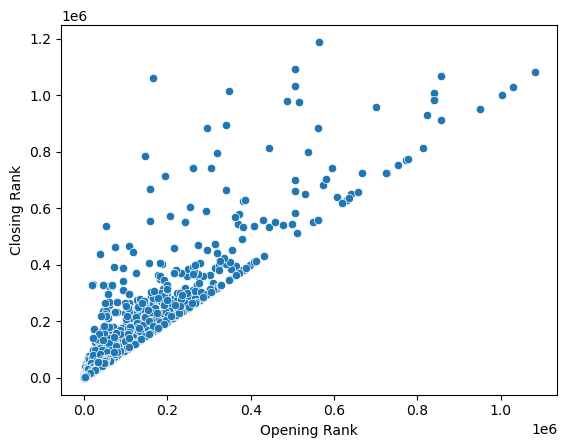

In [102]:
sns.scatterplot(data=sample_df, x="Opening Rank", y="Closing Rank")

- The scatter plot shows a clear **positive relationship** between opening rank and closing rank.  
- Almost all data points lie **above or on the diagonal**, confirming that seats always close at ranks equal to or higher than where they open.
- The dense triangular region near lower ranks indicates **high competition**, where opening and closing ranks are very close, especially for top institutes and popular branches.  
- Points that lie farther from the diagonal represent seats that experienced **greater rank relaxation**, typically in later counselling rounds or for low-demand programs.

This visualization confirms the **logical correctness and reliability** of the cutoff data.

## Final EDA Conclusion

The exploratory data analysis of the JoSAA JEE cutoff dataset confirms that the data is **large, clean, consistent, and reliable** for building a college prediction system.

The analysis shows that:
- The dataset has broad coverage across **multiple counselling years and rounds**
- **NITs dominate** the dataset due to higher program and seat availability, followed by IITs, GFTIs, and IIITs
- **Computer Science and Engineering** is the most frequently offered and competitive branch
- OPEN category seats account for the majority of records, with reserved categories following the expected allocation structure
- Gender-neutral seats dominate, while female-only seats form a significant but good share
- Opening and closing rank distributions are **right-skewed**, reflecting high competition for popular programs and relaxed cutoffs for low-demand seats

Overall, the EDA validates both the **quality of the data** and the **real-world admission patterns** captured in the dataset.  
The insights gained from this analysis provide a strong foundation for implementing a **rule-based JEE College Predictor** using historical cutoff data.


## Feature Engineering

In [103]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,5057.0,6780.0,1,2018,IIT
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),10078.0,10789.0,1,2018,IIT
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,1649.0,2592.0,1,2018,IIT
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),4343.0,4522.0,1,2018,IIT
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1054.0,1233.0,1,2018,IIT


In [104]:
text_cols = ["Institute", "Academic Program Name", "Quota", "Seat Type", "Gender"]

for col in text_cols:
    df[col] = df[col].str.strip()

In [105]:
df["Seat Type"].value_counts()

Seat Type
OPEN             90562
OBC-NCL          82624
SC               81892
ST               68365
EWS              62886
OPEN (PwD)       25353
OBC-NCL (PwD)    13041
EWS (PwD)         3357
SC (PwD)          3219
ST (PwD)          1225
Name: count, dtype: int64

In [106]:
seat_map = {
    "OPEN": "General",
    "OBC-NCL": "OBC",
    "SC": "SC",
    "ST": "ST",
    "EWS": "EWS"
}

In [107]:
df["Category"] = df["Seat Type"].map(seat_map).fillna(df["Seat Type"])

In [108]:
gender_map = {
"Gender-Neutral":"Male",
"Female-only (including Supernumerary)": "Female"
}

In [109]:
df["Gender"] = df["Gender"].map(gender_map).fillna(df["Gender"])

In [110]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Male,5057.0,6780.0,1,2018,IIT,General
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female,10078.0,10789.0,1,2018,IIT,General
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Male,1649.0,2592.0,1,2018,IIT,OBC
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female,4343.0,4522.0,1,2018,IIT,OBC
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Male,1054.0,1233.0,1,2018,IIT,SC


In [111]:
df["Category"].value_counts()

Category
General          90562
OBC              82624
SC               81892
ST               68365
EWS              62886
OPEN (PwD)       25353
OBC-NCL (PwD)    13041
EWS (PwD)         3357
SC (PwD)          3219
ST (PwD)          1225
Name: count, dtype: int64

In [112]:
df["Academic Program Name"].value_counts().index

Index(['Computer Science and Engineering (4 Years, Bachelor of Technology)',
       'Electronics and Communication Engineering (4 Years, Bachelor of Technology)',
       'Mechanical Engineering (4 Years, Bachelor of Technology)',
       'Civil Engineering (4 Years, Bachelor of Technology)',
       'Electrical Engineering (4 Years, Bachelor of Technology)',
       'Chemical Engineering (4 Years, Bachelor of Technology)',
       'Electrical and Electronics Engineering (4 Years, Bachelor of Technology)',
       'Metallurgical and Materials Engineering (4 Years, Bachelor of Technology)',
       'Information Technology (4 Years, Bachelor of Technology)',
       'Architecture (5 Years, Bachelor of Architecture)',
       ...
       'Integrated B. Tech. - M. Tech in Computer Science & Engineering (5 Years, Integrated B. Tech. and M. Tech.)',
       'Integrated B. Tech.- M. Tech in Metallurgical & Materials Engineering (5 Years, Integrated B. Tech. and M. Tech.)',
       'Bachelor of Design (4 

In [113]:
df["Branch"] = df["Academic Program Name"].str.extract(
    r"(Computer Science and Engineering|Electronics and Communication Engineering|Mechanical Engineering|Civil Engineering|Electrical Engineering)",
    expand=False
)

In [114]:
df["Branch"] = df["Branch"].fillna("Other")

In [115]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category,Branch
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Male,5057.0,6780.0,1,2018,IIT,General,Civil Engineering
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female,10078.0,10789.0,1,2018,IIT,General,Civil Engineering
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Male,1649.0,2592.0,1,2018,IIT,OBC,Civil Engineering
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female,4343.0,4522.0,1,2018,IIT,OBC,Civil Engineering
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Male,1054.0,1233.0,1,2018,IIT,SC,Civil Engineering


In [116]:
df["Branch"].value_counts()

Branch
Other                                        199107
Computer Science and Engineering              66244
Electronics and Communication Engineering     46648
Mechanical Engineering                        45937
Civil Engineering                             40981
Electrical Engineering                        33607
Name: count, dtype: int64

In [117]:
def rank_to_percentile(rank, total_candidates=1300000):
    return round(100 - (rank / total_candidates) * 100, 2)

In [118]:
df["Opening Percentile"] = df["Opening Rank"].apply(rank_to_percentile)
df["Closing Percentile"] = df["Closing Rank"].apply(rank_to_percentile)

<Axes: xlabel='Closing Rank', ylabel='Count'>

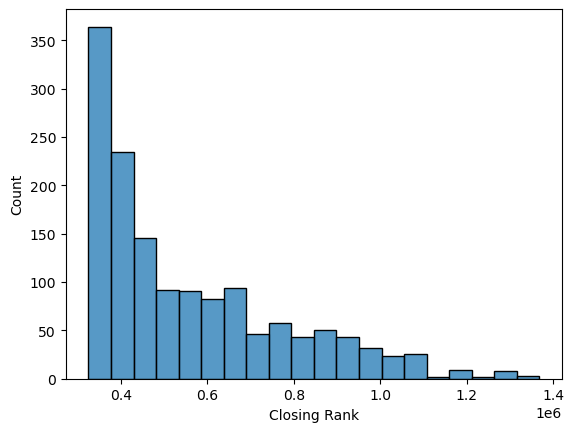

In [119]:
sns.histplot(df["Closing Rank"][df["Closing Percentile"] < 75])

- This histogram shows the distribution of **closing ranks for seats where the closing percentile is below 75**.  
- The distribution is heavily skewed toward **very high ranks**, indicating that these seats are typically available only in **later counselling rounds** and belong to **low-demand programs or institutes**.
- Since admissions at this percentile range are highly uncertain and strongly dependent on round-wise seat movement, using them for default prediction may lead to misleading outcomes.  
Therefore, these records are excluded from standard predictions and are shown only when the


In [120]:
def percentile_to_marks(percentile):
    if percentile >= 99.9:
        return 285
    elif percentile >= 99.5:
        return 265
    elif percentile >= 99.0:
        return 245
    elif percentile >= 98.0:
        return 225
    elif percentile >= 97.0:
        return 210
    elif percentile >= 95.0:
        return 190
    elif percentile >= 93.0:
        return 175
    elif percentile >= 90.0:
        return 155
    elif percentile >= 88.0:
        return 140
    elif percentile >= 85.0:
        return 125
    elif percentile >= 80.0:
        return 110
    elif percentile >= 75.0:
        return 95
    else:
        return 80
#Here marks are approx value not correct value

In [121]:
df["Opening Marks"] = df["Opening Percentile"].apply(percentile_to_marks)
df["Closing Marks"] = df["Closing Percentile"].apply(percentile_to_marks)

In [122]:
df[df["Closing Marks"]<95]

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category,Branch,Opening Percentile,Closing Percentile,Opening Marks,Closing Marks
4155,National Institute of Technology Sikkim,"Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Male,180161.0,655607.0,1,2018,NIT,General,Civil Engineering,86.14,49.57,125,80
4156,National Institute of Technology Sikkim,"Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Female,222334.0,770959.0,1,2018,NIT,General,Civil Engineering,82.90,40.70,110,80
4166,National Institute of Technology Sikkim,"Computer Science and Engineering (4 Years, Bac...",HS,OPEN,Male,68368.0,338222.0,1,2018,NIT,General,Computer Science and Engineering,94.74,73.98,175,80
4169,National Institute of Technology Sikkim,"Computer Science and Engineering (4 Years, Bac...",HS,OBC-NCL,Female,348210.0,348210.0,1,2018,NIT,OBC,Computer Science and Engineering,73.21,73.21,80,80
4180,National Institute of Technology Sikkim,Electrical and Electronics Engineering (4 Year...,HS,OPEN,Male,248371.0,662909.0,1,2018,NIT,General,Other,80.89,49.01,110,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433448,"Puducherry Technological University, Puducherry","Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Male,250437.0,386246.0,6,2025,GFTI,General,Civil Engineering,80.74,70.29,110,80
433492,"Puducherry Technological University, Puducherry","Mechanical Engineering (4 Years, Bachelor of T...",HS,OPEN,Male,208475.0,420915.0,6,2025,GFTI,General,Mechanical Engineering,83.96,67.62,110,80
433504,Ghani Khan Choudhary Institute of Engineering ...,"Civil and Environmental Engineering (4 Years, ...",HS,OPEN,Male,164509.0,404711.0,6,2025,GFTI,General,Other,87.35,68.87,125,80
433505,Ghani Khan Choudhary Institute of Engineering ...,"Civil and Environmental Engineering (4 Years, ...",HS,OPEN,Female,395170.0,418013.0,6,2025,GFTI,General,Other,69.60,67.85,80,80


In [123]:
df["PWD_Status"] = df["Seat Type"].str.contains("PwD", case=False, na=False)
df["PWD_Status"] = df["PWD_Status"].map({True: "Yes", False: "No"})

## Feature Engineering Conclusion

The feature engineering process focused on transforming raw JoSAA cutoff data into **clear, interpretable, and usable features** suitable for a rule-based college prediction system.

Key transformations included:
- Standardizing text columns
- Extracted core branch information and Standardized Category Pwd,Gender column
- Deriving eligibility-oriented features such as opening and closing percentiles and approximate marks

No encoding or scaling was applied, as the project does not involve machine learning models.  
All engineered features were designed to directly support **accurate eligibility checking, transparent decision logic, and a user-friendly application interface**.

Overall, the feature engineering process ensures that the dataset is **prediction-ready, logically consistent, and aligned with real-world counselling dynamics**, providing a strong foundation for building the JEE College Predictor application.


## Splitting Data For Jee Mains and Advance

In [124]:
jee_main_df = df[df["Institute Type"] != "IIT"]

In [125]:
jee_advanced_df = df[df["Institute Type"] == "IIT"]

In [126]:
jee_main_df.to_csv("jee_main_cutoffs.csv", index=True)

In [127]:
jee_advanced_df.to_csv("jee_advanced_cutoffs.csv", index=True)

In [128]:
jee_advanced_df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category,Branch,Opening Percentile,Closing Percentile,Opening Marks,Closing Marks,PWD_Status
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Male,5057.0,6780.0,1,2018,IIT,General,Civil Engineering,99.61,99.48,265,245,No
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female,10078.0,10789.0,1,2018,IIT,General,Civil Engineering,99.22,99.17,245,245,No
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Male,1649.0,2592.0,1,2018,IIT,OBC,Civil Engineering,99.87,99.80,265,265,No
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female,4343.0,4522.0,1,2018,IIT,OBC,Civil Engineering,99.67,99.65,265,265,No
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Male,1054.0,1233.0,1,2018,IIT,SC,Civil Engineering,99.92,99.91,285,285,No


In [129]:
jee_main_df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category,Branch,Opening Percentile,Closing Percentile,Opening Marks,Closing Marks,PWD_Status
1947,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Male,31339.0,40879.0,1,2018,NIT,General,Other,97.59,96.86,210,190,No
1948,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Female,31323.0,40864.0,1,2018,NIT,General,Other,97.59,96.86,210,190,No
1949,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OBC-NCL,Male,30392.0,40505.0,1,2018,NIT,OBC,Other,97.66,96.88,210,190,No
1950,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OBC-NCL,Female,39299.0,39299.0,1,2018,NIT,OBC,Other,96.98,96.98,190,190,No
1951,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,SC,Male,8893.0,8893.0,1,2018,NIT,SC,Other,99.32,99.32,245,245,No


## Final Conclusion

This notebook documents the complete **data preparation and analysis pipeline** for building a reliable JEE College Predictor.  
The focus was on ensuring **data correctness, domain alignment, and ethical decision-making** rather than forcing inappropriate machine learning models.

Key outcomes of this work include:
- Cleaning and consolidating multi-year JoSAA cutoff data into a consistent and analysis-ready format
- Performing detailed EDA to understand year-wise distribution, institute types, branches, categories, and cutoff behavior
- Applying feature engineering to extract meaningful attributes such as institute type, core branches, and cutoff ranges
- Designing percentile and marks approximations carefully, backed by observed cutoff distributions
- Identifying and handling low-confidence scenarios (very low percentiles and marks) to prevent misleading predictions
- Structuring the data into **exam-specific datasets** for JEE Main and JEE Advanced, reflecting real counselling rules

No machine learning model was used, as the problem is **eligibility-based rather than predictive**.  
Admissions depend on historical cutoff thresholds, making a **rule-based system** more accurate, transparent, and explainable than statistical models.

The final output of this notebook is a set of **clean, validated CSV datasets** that serve as inputs to the deployed application.  
This separation ensures that the application layer remains lightweight while all analytical reasoning and decisions remain fully traceable.

Overall, this notebook establishes a **solid analytical foundation** for the JEE College Predictor 

In [130]:
jee_main_df[(jee_main_df["Closing Rank"]>400000) | (jee_main_df["Closing Percentile"]<75) | (jee_main_df["Closing Marks"]<95) ]

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Round,Year,Institute Type,Category,Branch,Opening Percentile,Closing Percentile,Opening Marks,Closing Marks,PWD_Status
4155,National Institute of Technology Sikkim,"Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Male,180161.0,655607.0,1,2018,NIT,General,Civil Engineering,86.14,49.57,125,80,No
4156,National Institute of Technology Sikkim,"Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Female,222334.0,770959.0,1,2018,NIT,General,Civil Engineering,82.90,40.70,110,80,No
4166,National Institute of Technology Sikkim,"Computer Science and Engineering (4 Years, Bac...",HS,OPEN,Male,68368.0,338222.0,1,2018,NIT,General,Computer Science and Engineering,94.74,73.98,175,80,No
4169,National Institute of Technology Sikkim,"Computer Science and Engineering (4 Years, Bac...",HS,OBC-NCL,Female,348210.0,348210.0,1,2018,NIT,OBC,Computer Science and Engineering,73.21,73.21,80,80,No
4180,National Institute of Technology Sikkim,Electrical and Electronics Engineering (4 Year...,HS,OPEN,Male,248371.0,662909.0,1,2018,NIT,General,Other,80.89,49.01,110,80,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433448,"Puducherry Technological University, Puducherry","Civil Engineering (4 Years, Bachelor of Techno...",HS,OPEN,Male,250437.0,386246.0,6,2025,GFTI,General,Civil Engineering,80.74,70.29,110,80,No
433492,"Puducherry Technological University, Puducherry","Mechanical Engineering (4 Years, Bachelor of T...",HS,OPEN,Male,208475.0,420915.0,6,2025,GFTI,General,Mechanical Engineering,83.96,67.62,110,80,No
433504,Ghani Khan Choudhary Institute of Engineering ...,"Civil and Environmental Engineering (4 Years, ...",HS,OPEN,Male,164509.0,404711.0,6,2025,GFTI,General,Other,87.35,68.87,125,80,No
433505,Ghani Khan Choudhary Institute of Engineering ...,"Civil and Environmental Engineering (4 Years, ...",HS,OPEN,Female,395170.0,418013.0,6,2025,GFTI,General,Other,69.60,67.85,80,80,No
